## Car Price Prediction Project

In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error



In [511]:
# 1. Loading and Preprocessing (5 marks)

car_df = pd.read_csv("CarPrice_Assignment.csv")
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [512]:
# car_df.drop(['car_ID'], axis=1, inplace=True)

In [513]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [514]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### No Null Values found above

#### So lets check for any duplicates exists to be removed

In [516]:
car_df.duplicated().sum()

car_df_copy = car_df.copy()

##### No Duplicates exists to be removed

In [518]:
numeric_cols = car_df.drop('price',axis=1).select_dtypes(include = np.number).columns
categorical_cols = car_df.select_dtypes(exclude = np.number).columns
print("Categorical Columns are : ", categorical_cols)
print("\nNumeric Columns and their Skewness: \n", numeric_cols)

car_df[numeric_cols].skew()

Categorical Columns are :  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Numeric Columns and their Skewness: 
 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
dtype: float64

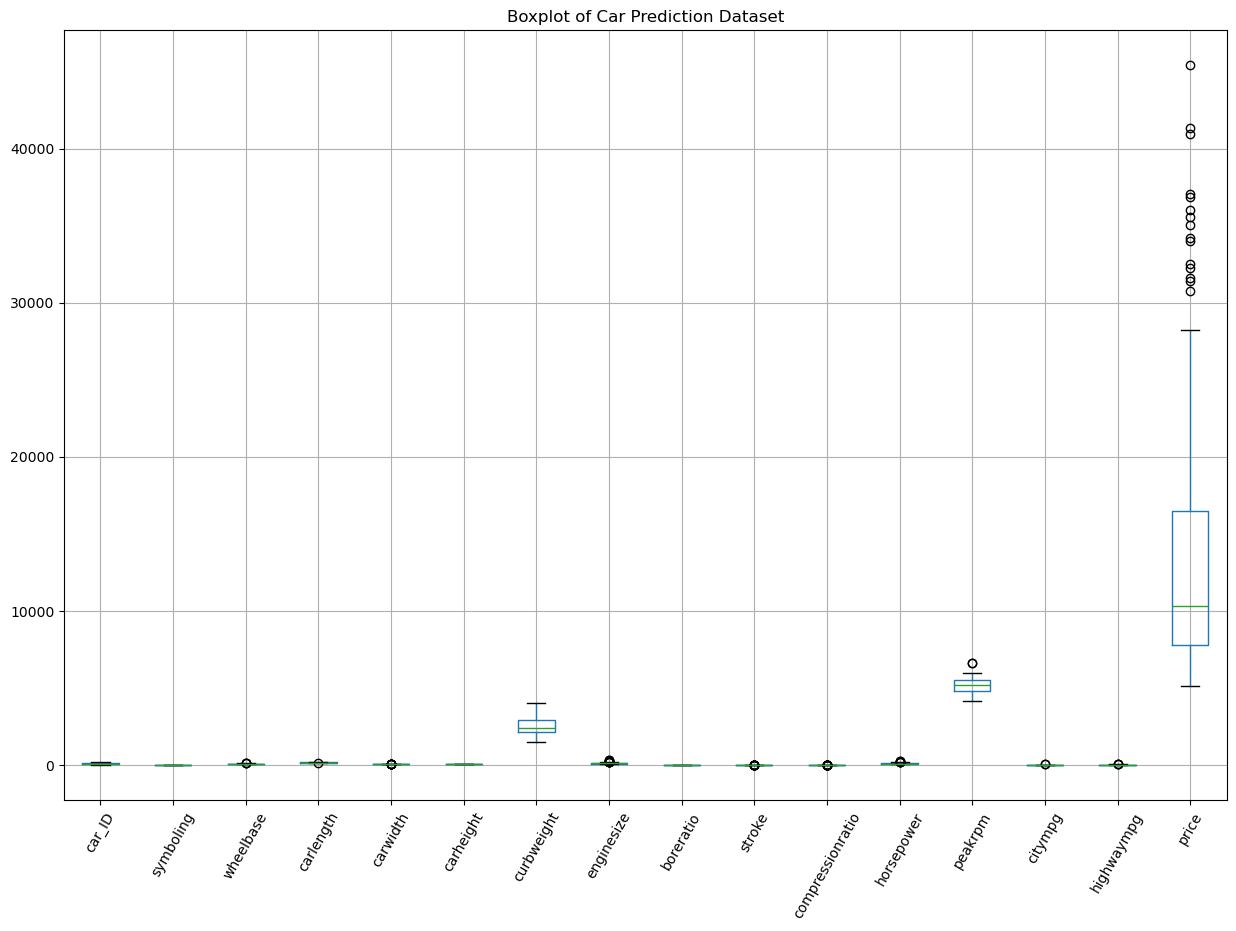

In [519]:
#for columns in numeric_cols:

plt.figure(figsize=(15,10))
car_df.boxplot()
plt.xticks(rotation=60)
plt.title("Boxplot of Car Prediction Dataset")
plt.show()

#### Label Encoding

In [522]:
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [523]:
print(car_df.CarName.value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


### There are a number of CarName in this Dataset. So lets extract the BrandName from this column and create a new Column

In [525]:
#car_df['Brand'] 

a = 'toyota corona'
a.split()

['toyota', 'corona']

In [526]:
a.split()[0]

'toyota'

In [527]:
car_df['Brand']=car_df['CarName'].apply(lambda x: x.split(" ")[0])       # Extract first word from carname and save it as Brand

In [528]:
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [529]:
print(car_df.Brand.value_counts().sort_values(ascending=True))
print(car_df.Brand.unique())

Brand
porcshce        1
Nissan          1
vokswagen       1
toyouta         1
mercury         1
renault         2
maxda           2
vw              2
jaguar          3
chevrolet       3
alfa-romero     3
porsche         4
isuzu           4
saab            6
plymouth        7
audi            7
bmw             8
buick           8
dodge           9
volkswagen      9
volvo          11
peugeot        11
subaru         12
mitsubishi     13
honda          13
mazda          15
nissan         17
toyota         31
Name: count, dtype: int64
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


#### Correcting the names of Brands which have speeling mistakes or are shortforms

In [531]:
car_df.loc[(car_df['Brand']=="toyouta"),"Brand"]="toyota"

In [532]:
car_df.loc[(car_df['Brand']=="vw"),"Brand"]="volkswagen"

In [533]:
car_df.loc[(car_df['Brand']=="vokswagen"),"Brand"]="volkswagen"

In [534]:
car_df.loc[(car_df['Brand']=="maxda"),"Brand"]="mazda"

In [535]:
car_df.loc[(car_df['Brand']=="Nissan"),"Brand"]="nissan"

In [536]:
car_df.loc[(car_df['Brand']=="porcshce"),"Brand"]="porsche"

In [537]:
car_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [538]:
car_df.drop('CarName', axis=1, inplace=True)

In [539]:
car_df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


## Feature Engineering Steps

### Label Encoding using Pandas get_dummies() on Catergorical Columns

In [542]:
categorical_cols = car_df.select_dtypes(exclude = np.number).columns
print("Categorical Columns are : ", categorical_cols)

Categorical Columns are :  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Brand'],
      dtype='object')


In [543]:
#original_categories = label_encoder.inverse_transform(encoded_labels)
#original_categories

In [544]:
car_df  # Before applying Label Encoding

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [545]:
car_df_encoded=pd.get_dummies(car_df,columns=categorical_cols,drop_first=True)


In [546]:
car_df_encoded  # After applying Label Encoding

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,False,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,False,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,False,False,True
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,False,False,True
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,False,False,True
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,False,False,False,False,True


In [547]:
car_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

## Feature Scaling / STANDARDIZATION

In [549]:
car_df_cleared = car_df.copy()

In [550]:
print("\nNumeric Columns : \n", numeric_cols)


Numeric Columns : 
 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


### Using MINMAX SCALER

In [552]:
scaler = MinMaxScaler()
car_df_encoded[numeric_cols] = scaler.fit_transform(car_df_encoded[numeric_cols])


In [553]:
car_df_encoded.drop(columns=['car_ID'], axis=1, inplace=True) #########################################

In [554]:
car_df_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,False,False,False,False,False,False,False,False,False,False
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,...,False,False,False,False,False,False,False,False,False,False
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,...,False,False,False,False,False,False,False,False,False,False
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,...,False,False,False,False,False,False,False,False,False,True
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,...,False,False,False,False,False,False,False,False,False,True
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,...,False,False,False,False,False,False,False,False,False,True
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,...,False,False,False,False,False,False,False,False,False,True


## Correlation Based Feature Selection

In [556]:
car_df_encoded.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.041422,-0.159891,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.094046,0.167106,-0.403849
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.156719,0.453616,-0.105511,-0.170472,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.077149,0.330602,-0.139780,-0.048682,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.118727,0.276302,-0.143778,0.089564,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.011652,0.337701,-0.135256,-0.170265,-0.035625,0.169192,0.002570,-0.000530,0.149194,0.245342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brand_saab,0.232847,0.009927,0.177076,0.048052,0.169192,0.063495,-0.024692,0.028006,-0.195426,-0.041231,...,-0.053872,-0.041347,-0.032649,-0.027455,-0.017235,1.000000,-0.043297,-0.074679,-0.043297,-0.041347
Brand_subaru,-0.067071,-0.107161,-0.105172,-0.111605,0.002570,-0.114888,-0.118994,0.267866,-0.509133,-0.083437,...,-0.077362,-0.059376,-0.046884,-0.039426,-0.024750,-0.043297,1.000000,-0.107242,-0.062176,-0.059376
Brand_toyota,-0.094046,-0.046785,-0.073906,-0.164234,-0.000530,-0.094786,-0.083807,-0.079203,-0.000570,0.021501,...,-0.133434,-0.102411,-0.080866,-0.068002,-0.042689,-0.074679,-0.107242,1.000000,-0.107242,-0.102411
Brand_volkswagen,0.167106,-0.047664,-0.030714,-0.033924,0.149194,-0.101966,-0.117994,-0.184355,0.115246,0.219153,...,-0.077362,-0.059376,-0.046884,-0.039426,-0.024750,-0.043297,-0.062176,-0.107242,1.000000,-0.059376


In [557]:
# We dont need Target feature in this - PRICE. So we will remove it.
my_corr = car_df_encoded.drop('price', axis=1).corr()


In [558]:
my_corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.041422,-0.159891,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.094046,0.167106,-0.403849
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.156719,0.453616,-0.105511,-0.170472,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.077149,0.330602,-0.139780,-0.048682,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.118727,0.276302,-0.143778,0.089564,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.011652,0.337701,-0.135256,-0.170265,-0.035625,0.169192,0.002570,-0.000530,0.149194,0.245342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brand_saab,0.232847,0.009927,0.177076,0.048052,0.169192,0.063495,-0.024692,0.028006,-0.195426,-0.041231,...,-0.053872,-0.041347,-0.032649,-0.027455,-0.017235,1.000000,-0.043297,-0.074679,-0.043297,-0.041347
Brand_subaru,-0.067071,-0.107161,-0.105172,-0.111605,0.002570,-0.114888,-0.118994,0.267866,-0.509133,-0.083437,...,-0.077362,-0.059376,-0.046884,-0.039426,-0.024750,-0.043297,1.000000,-0.107242,-0.062176,-0.059376
Brand_toyota,-0.094046,-0.046785,-0.073906,-0.164234,-0.000530,-0.094786,-0.083807,-0.079203,-0.000570,0.021501,...,-0.133434,-0.102411,-0.080866,-0.068002,-0.042689,-0.074679,-0.107242,1.000000,-0.107242,-0.102411
Brand_volkswagen,0.167106,-0.047664,-0.030714,-0.033924,0.149194,-0.101966,-0.117994,-0.184355,0.115246,0.219153,...,-0.077362,-0.059376,-0.046884,-0.039426,-0.024750,-0.043297,-0.062176,-0.107242,1.000000,-0.059376


<Axes: >

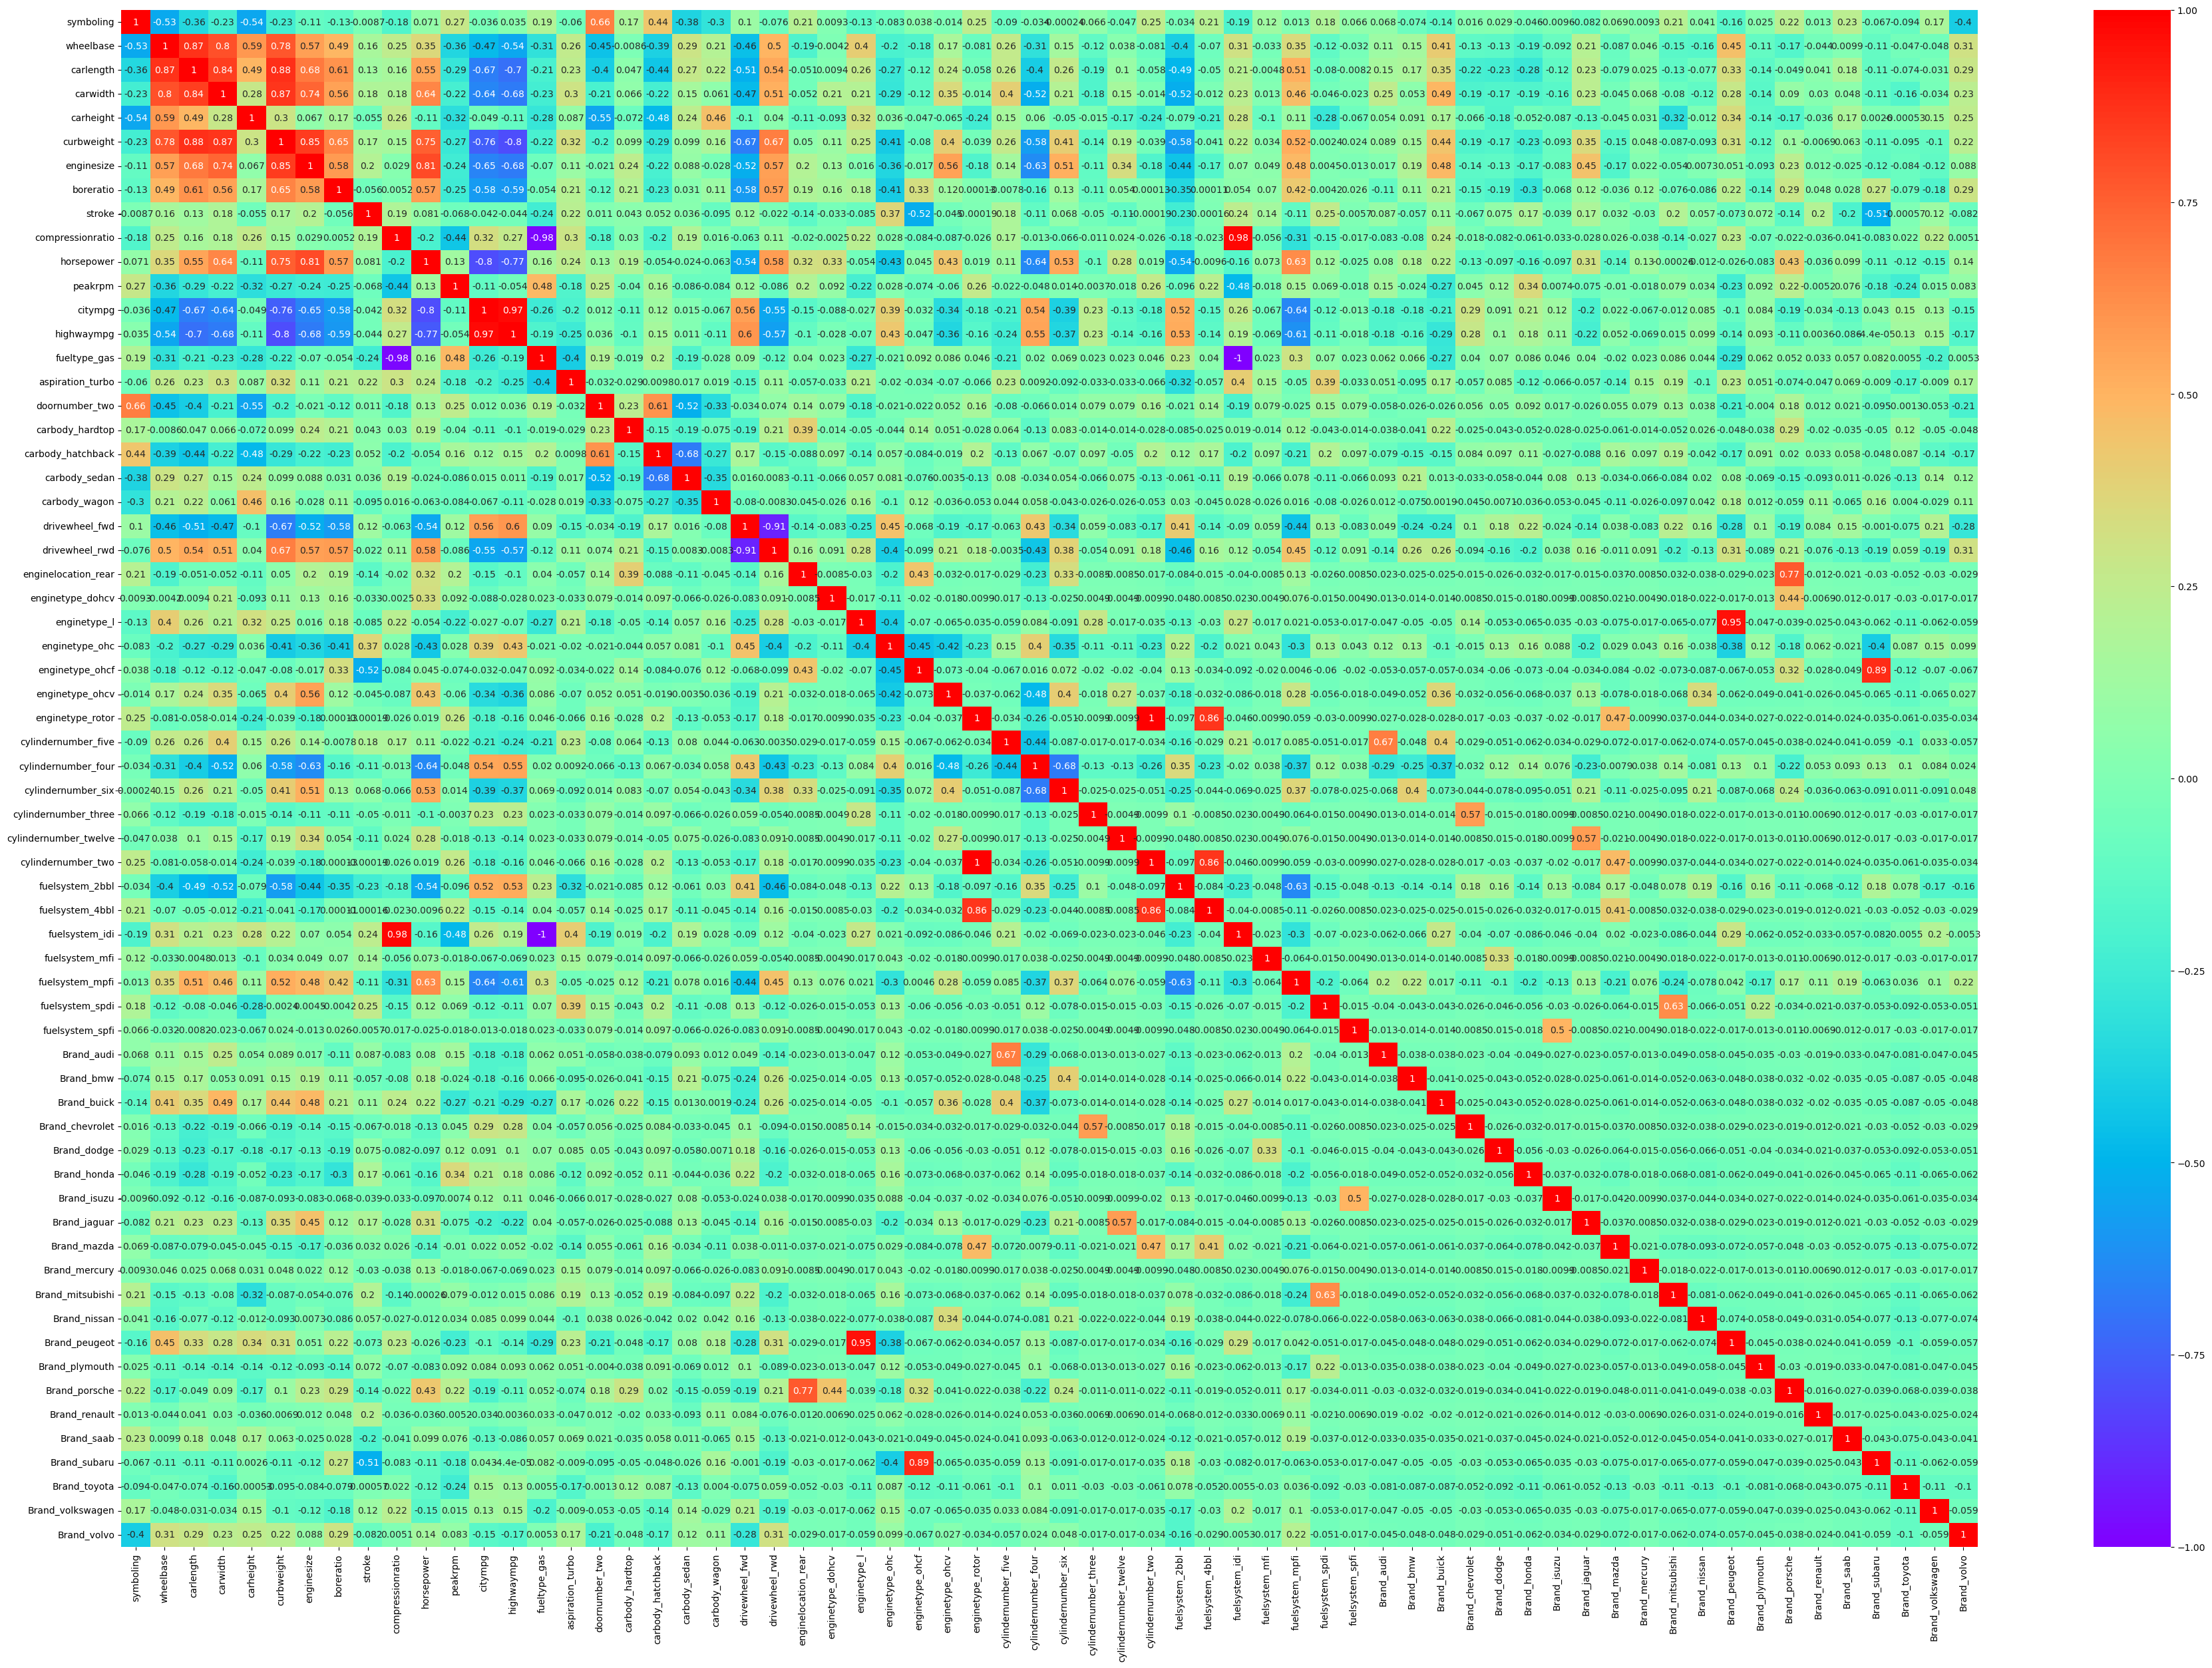

In [559]:
fig, ax = plt.subplots(figsize=(45, 30))
sns.heatmap(my_corr, annot = True,cmap="rainbow")

## Trying Feature Selection based on correlation with Target feature - price

In [561]:
correlation_matrix = car_df_encoded.corr()
correlation_with_price = correlation_matrix["price"].abs().sort_values(ascending=False)
selected_features = correlation_with_price[correlation_with_price > 0.3].index.tolist()
selected_features.remove("price")

In [562]:
correlation_with_price

price                 1.000000
enginesize            0.874145
curbweight            0.835305
horsepower            0.808139
carwidth              0.759325
                        ...   
fuelsystem_4bbl       0.017306
enginetype_ohcf       0.016285
enginetype_rotor      0.004544
cylindernumber_two    0.004544
fuelsystem_mfi        0.002747
Name: price, Length: 65, dtype: float64

In [563]:
selected_features

['enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'cylindernumber_four',
 'highwaympg',
 'citympg',
 'carlength',
 'drivewheel_rwd',
 'drivewheel_fwd',
 'wheelbase',
 'boreratio',
 'fuelsystem_mpfi',
 'Brand_buick',
 'fuelsystem_2bbl',
 'cylindernumber_six',
 'enginetype_ohcv',
 'Brand_porsche',
 'enginetype_ohc',
 'Brand_jaguar',
 'enginelocation_rear',
 'Brand_bmw']

In [564]:
X = car_df_encoded[selected_features]
y = car_df_encoded["price"]

<Axes: >

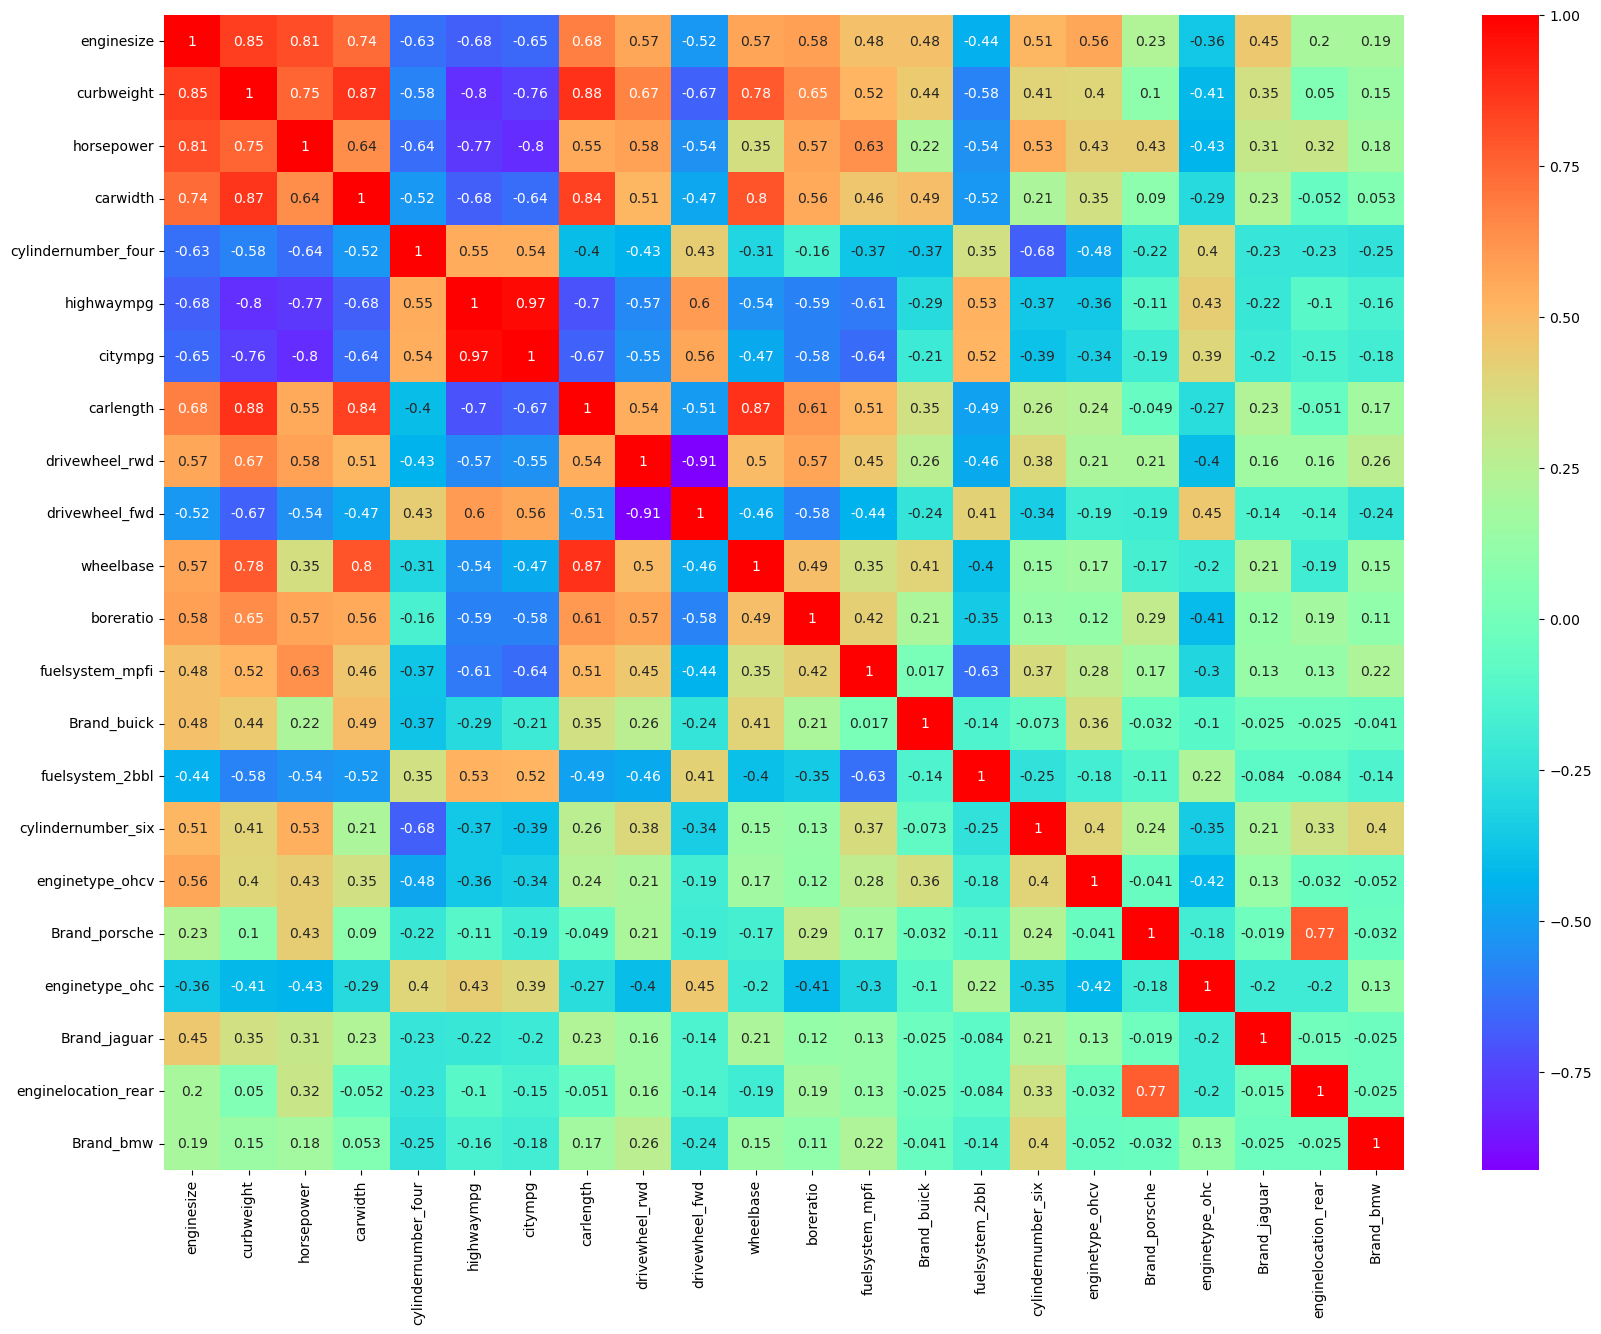

In [565]:
# Correlation Matrix of only Selected Features used for Modelling
new_my_corr = X.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(new_my_corr, annot = True,cmap="rainbow")

## MODEL BUILDING

In [567]:
X

,enginesize,curbweight,horsepower,carwidth,cylindernumber_four,highwaympg,citympg,carlength,drivewheel_rwd,drivewheel_fwd,...,fuelsystem_mpfi,Brand_buick,fuelsystem_2bbl,cylindernumber_six,enginetype_ohcv,Brand_porsche,enginetype_ohc,Brand_jaguar,enginelocation_rear,Brand_bmw
0,0.260377,0.411171,0.262500,0.316667,True,0.289474,0.222222,0.413433,True,False,...,True,False,False,False,False,False,False,False,False,False
1,0.260377,0.411171,0.262500,0.316667,True,0.289474,0.222222,0.413433,True,False,...,True,False,False,False,False,False,False,False,False,False
2,0.343396,0.517843,0.441667,0.433333,False,0.263158,0.166667,0.449254,True,False,...,True,False,False,True,True,False,False,False,False,False
3,0.181132,0.329325,0.225000,0.491667,True,0.368421,0.305556,0.529851,False,True,...,True,False,False,False,False,False,True,False,False,False
4,0.283019,0.518231,0.279167,0.508333,False,0.157895,0.138889,0.529851,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.301887,0.567882,0.275000,0.716667,True,0.315789,0.277778,0.711940,True,False,...,True,False,False,False,False,False,True,False,False,False
201,0.301887,0.605508,0.466667,0.708333,True,0.236842,0.166667,0.711940,True,False,...,True,False,False,False,False,False,True,False,False,False
202,0.422642,0.591156,0.358333,0.716667,False,0.184211,0.138889,0.711940,True,False,...,True,False,False,True,True,False,False,False,False,False
203,0.316981,0.670675,0.241667,0.716667,False,0.289474,0.361111,0.711940,True,False,...,False,False,False,True,False,False,True,False,False,False


In [568]:
#X_scaled = car_df_cleared.drop('price', axis = 1)
#y = car_df_cleared['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [569]:
model=LinearRegression()
#  Split the dataset into training and testing sets has been done earlier for KNN. So using the same split data here and for all models
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   -- already created during KNN Regression
model.fit(X_train,y_train)


LinearRegression()

In [570]:
y_pred=model.predict(X_test)
y_pred

array([27676.67844819, 19831.97609278,  9523.58781256, 12717.19679626,
       34981.72105352,  6435.73237126,  7803.38985315,  7296.79825561,
       10075.75281692,  8456.99361332, 15628.75871179,  8123.91159437,
       13246.71594177, 11402.9189276 , 38108.21006318,  6032.53491614,
        2749.12619537, 14662.16801237,  9900.18957507,  9551.84856956,
       10468.5807155 , 15304.2763379 ,  6341.66368838,  6102.75654567,
        6467.48417137, 29151.03803402, 12865.27564507, 15732.01504921,
        6426.17242766, 15140.74316994, 33842.79571231,  6360.86137347,
        7059.94269102, 16134.23425155,  8264.81360001, 33972.9004405 ,
       10798.389707  , 11961.79124039,  6110.67394879, 15099.99773761,
        8325.12294948])

In [571]:
Linear_reg_result_df=pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred})

Linear_reg_result_df

,Actual Values,Predicted Values
15,30760.000,27676.678448
9,17859.167,19831.976093
100,9549.000,9523.587813
132,11850.000,12717.196796
68,28248.000,34981.721054
95,7799.000,6435.732371
159,7788.000,7803.389853
162,9258.000,7296.798256
147,10198.000,10075.752817
182,7775.000,8456.993613


In [572]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)              # R2 SCORE

print('\n\tLINEAR REGRESSION')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

#results['LINEAR REGRESSION'] = {"MSE": mse, "MAE": mae, "R2 Score": r2}


	LINEAR REGRESSION
Mean Squared Error: 10831992.096780462
Mean Absolute Error: 2197.379686752427
R-squared: 0.8627889487249103


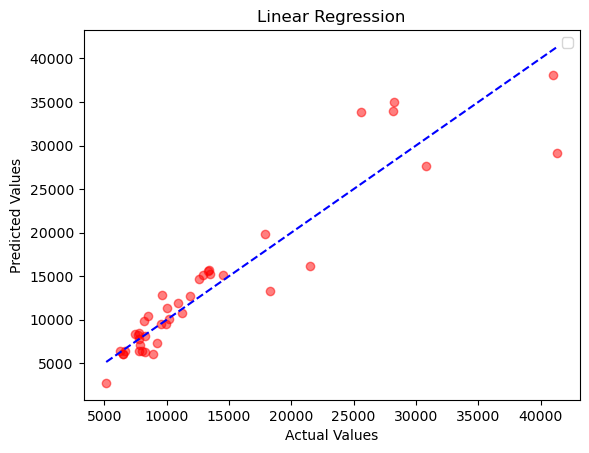

In [573]:
# Visualize the results
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='dashed')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Linear Regression')
plt.legend()
plt.show()

In [574]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

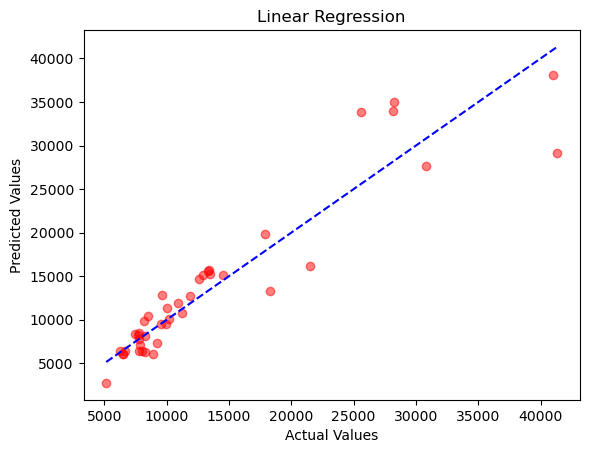


	Feature Importance for : 	 Linear Regression 
 enginelocation_rear    13979.563290
curbweight             12494.253318
Brand_buick            11205.534589
carwidth                9634.517128
Brand_bmw               7970.314490
horsepower              7832.322799
Brand_jaguar            7466.890824
enginesize              3781.079761
Brand_porsche           3495.604030
wheelbase               1951.241764
cylindernumber_four     1924.934336
cylindernumber_six      1885.904649
boreratio               1805.148861
citympg                 1719.164531
enginetype_ohcv         1487.031097
drivewheel_rwd           858.661259
carlength                774.554387
highwaympg               770.474357
fuelsystem_mpfi          655.159692
enginetype_ohc           364.746989
drivewheel_fwd           108.847118
fuelsystem_2bbl           27.171121
dtype: float64 





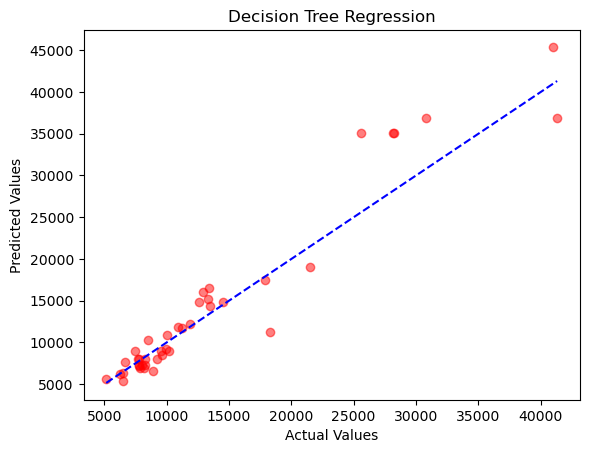


	Feature Importance for : 	 Decision Tree Regression 
 enginesize             0.651953
curbweight             0.271619
horsepower             0.020461
highwaympg             0.018238
carwidth               0.016343
Brand_bmw              0.007789
carlength              0.006257
wheelbase              0.002522
citympg                0.001909
boreratio              0.001089
drivewheel_rwd         0.001074
enginetype_ohc         0.000456
Brand_jaguar           0.000153
fuelsystem_mpfi        0.000136
fuelsystem_2bbl        0.000002
drivewheel_fwd         0.000000
cylindernumber_four    0.000000
Brand_buick            0.000000
cylindernumber_six     0.000000
enginetype_ohcv        0.000000
Brand_porsche          0.000000
enginelocation_rear    0.000000
dtype: float64 



[5.59070737e-01 2.91123438e-01 3.65681074e-02 1.53677922e-02
 1.77666184e-03 4.83967818e-02 6.81183378e-03 9.45138730e-03
 9.14238939e-04 5.02033328e-04 8.61836247e-03 6.41261398e-03
 2.94090073e-03 4.64957098e-04 6.38395

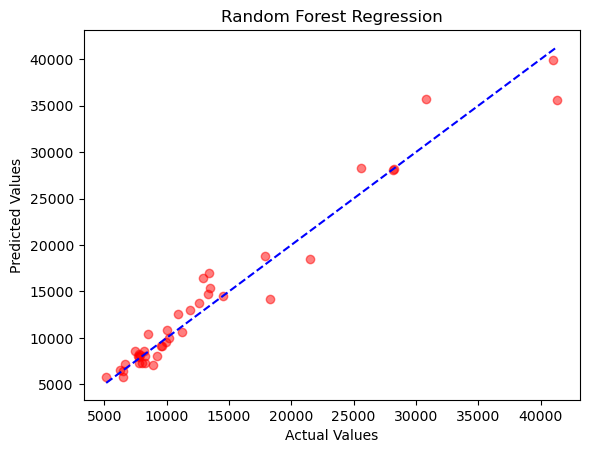


	Feature Importance for : 	 Random Forest Regression 
                 Feature  Gini Importance
0            enginesize         0.559071
1            curbweight         0.291123
5            highwaympg         0.048397
2            horsepower         0.036568
3              carwidth         0.015368
7             carlength         0.009451
21            Brand_bmw         0.009181
10            wheelbase         0.008618
6               citympg         0.006812
11            boreratio         0.006413
12      fuelsystem_mpfi         0.002941
4   cylindernumber_four         0.001777
8        drivewheel_rwd         0.000914
18       enginetype_ohc         0.000822
14      fuelsystem_2bbl         0.000638
9        drivewheel_fwd         0.000502
13          Brand_buick         0.000465
17        Brand_porsche         0.000364
16      enginetype_ohcv         0.000277
15   cylindernumber_six         0.000238
19         Brand_jaguar         0.000040
20  enginelocation_rear         0.000019 


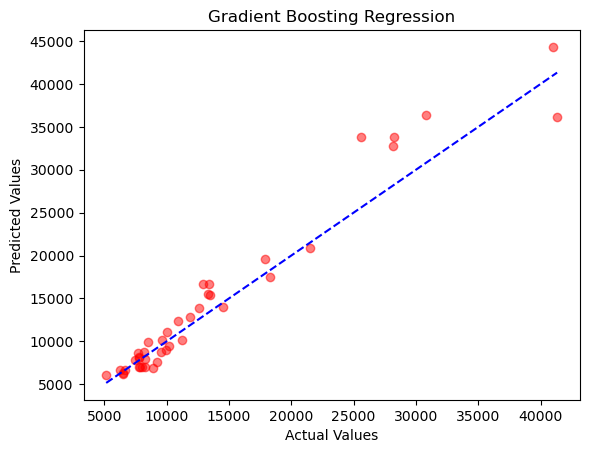


	Feature Importance for : 	 Gradient Boosting Regression 
                 Feature  Gini Importance
0            enginesize       100.000000
1            curbweight        29.291623
5            highwaympg        12.034834
2            horsepower         8.753165
10            wheelbase         3.337539
3              carwidth         2.698797
4   cylindernumber_four         1.797903
21            Brand_bmw         1.597915
7             carlength         1.528597
6               citympg         1.175818
8        drivewheel_rwd         0.956241
11            boreratio         0.857976
17        Brand_porsche         0.302170
14      fuelsystem_2bbl         0.201377
18       enginetype_ohc         0.165534
12      fuelsystem_mpfi         0.069002
15   cylindernumber_six         0.063096
16      enginetype_ohcv         0.017574
20  enginelocation_rear         0.014193
9        drivewheel_fwd         0.004914
13          Brand_buick         0.000000
19         Brand_jaguar         0.0000

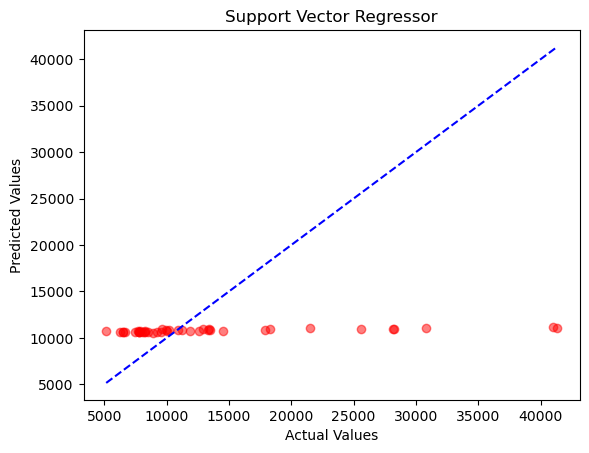


	Feature Importance for : 	 Support Vector Regressor 
 [] 





,Model,Accuracy (R2),MSE,MAE,R2-Score
2,Random Forest Regression,0.955696,3.497522e+06,1276.007244,0.955696
3,Gradient Boosting Regression,0.922365,6.128792e+06,1700.590514,0.922365
1,Decision Tree Regression,0.885596,9.031529e+06,1972.260171,0.885596
0,Linear Regression,0.862789,1.083199e+07,2197.379687,0.862789
4,Support Vector Regressor,-0.063049,8.392133e+07,5600.295791,-0.063049


In [663]:
from sklearn.inspection import permutation_importance

models = { 
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regression' : DecisionTreeRegressor(random_state = 0),
    'Random Forest Regression' : RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regression' : GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor' : SVR(kernel = 'poly')
}

# Train and Evaluate Models   max_depth=None,min_samples_split=2
results = []
for name , model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    feature_importance=[]
    if(name == 'Linear Regression' ):
        feature_importance = pd.Series(np.abs(model.coef_), index=X_train.columns).sort_values(ascending=False)
    if(name == 'Decision Tree Regression' ):
        feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    if(name == 'Random Forest Regression'):
        importances = model.feature_importances_
        #print("NIVED\n\n")
        print(importances)
        print('\t',importances[0])
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
    if(name == 'Gradient Boosting Regression'):
        feature_importance = model.feature_importances_
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        feature_importance =  pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': feature_importance}).sort_values('Gini Importance', ascending=False) 

    
    metrics = {
        'Model': name,
        'Accuracy (R2)': r2_score(y_test, y_pred),
        'MSE': mse,
        'MAE': mae,
        'R2-Score': r2       
    }

    results.append(metrics)

    plt.scatter(y_test, y_pred, color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='dashed')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(name)
    plt.show()

    print('\n\tFeature Importance for : \t',name,'\n',feature_importance,'\n\n\n')

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2-Score', ascending=False)

# Print the sorted DataFrame
results_df_sorted   #.drop('Important Features', axis=1)  # Excluding the Important features which are listed above




## Random Forest Regression is the best Method here as its RSquare Score is the highest of all

### SVM

In [655]:
if(name == 'Support Vector Regressor'):
    results = permutation_importance(model, X, y)
    importances = results.importances_mean
    print("NIVED SVM\n\n")
    print(importances)
    print('\t',importances[0])
    feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 


NIVED SVM


[ 1.75849044e-03  2.78270770e-03  1.61925836e-03  2.14802523e-03
 -1.54293371e-03  5.53371277e-05  1.60083428e-04  1.90810096e-03
  6.97627177e-03  2.83281947e-03  1.26187109e-03  1.44335718e-03
  6.11184584e-03  4.52932927e-04  3.63104111e-03  1.91030362e-03
  8.85488376e-04  2.55711247e-04 -8.62366647e-04  1.80606410e-04
  1.43677350e-04  3.80703415e-04]
	 0.0017584904429946758


In [657]:
feature_importance

,Feature,Gini Importance
8,drivewheel_rwd,0.006976
12,fuelsystem_mpfi,0.006112
14,fuelsystem_2bbl,0.003631
9,drivewheel_fwd,0.002833
1,curbweight,0.002783
3,carwidth,0.002148
15,cylindernumber_six,0.001910
7,carlength,0.001908
0,enginesize,0.001758
2,horsepower,0.001619


### HYPERPARAMETER TUNING

#### Let us try it on Random Forest Regressor - because it has got the highest accuracy as per the R Squared Value

In [580]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    #'n_estimators': [int(x) for x in np.linspace(start=100, stop=105, num=6)],
    'n_estimators': [int(x) for x in range(50,200,5)],
    'max_depth': [10, None],
    'random_state': [42],
    'min_samples_split': [2,3,4, 5, None],
    #'max_features': ['sqrt']
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, None],
                         'min_samples_split': [2, 3, 4, 5, None],
                         'n_estimators': [50, 55, 60, 65, 70, 75, 80, 85, 90,
                                          95, 100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, 155, 160, 165,
                                          170, 175, 180, 185, 190, 195],
                         'random_state': [42]})

In [581]:
# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)
print('MSE : ',mean_squared_error(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('R2-Score : ',r2_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 95, 'random_state': 42}
MSE :  3375677.707668577
MAE :  1261.3329183935448
R2-Score :  0.9572396025683254


In [582]:
param_grid

{'n_estimators': [50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195],
 'max_depth': [10, None],
 'random_state': [42],
 'min_samples_split': [2, 3, 4, 5, None]}

### BEFORE HYPERPARAMETER TUNING, THE R2-SCORE WAS 0.955696, WHICH MEANS 95.5696%.
### AFTER HYPERPARAMETER TUNING, THE R2-SCORE IS 0.9572396, WHICH MEANS 95.72396%. So surely this has increased the performance of this Random Forest Regression

In [584]:
y_pred

array([35401.20182957, 18850.86929825,  9091.01508772, 13129.65438596,
       27980.89192982,  7339.0964411 ,  7892.0322807 ,  8025.41972431,
       10241.29157895,  8211.94421053, 15004.53368421,  7966.02684211,
       14757.76964912, 10860.75017544, 39540.60350877,  6516.41105263,
        5780.68596491, 13748.90421053,  8578.60929825,  9735.7497995 ,
       10343.97929825, 15409.31473684,  7338.87275689,  5780.52065163,
        7109.01105263, 35482.04744361,  9396.66596491, 17009.77736842,
        7287.54907268, 16580.03175439, 27980.89192982,  6611.62736842,
        8065.6677193 , 18569.51149123,  8072.87403509, 27735.29017544,
       10960.71155388, 12541.22025063,  6988.93508772, 14407.36035088,
        8646.07070175])

In [585]:
hyper_result_df=pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred})
hyper_result_df

,Actual Values,Predicted Values
15,30760.000,35401.201830
9,17859.167,18850.869298
100,9549.000,9091.015088
132,11850.000,13129.654386
68,28248.000,27980.891930
95,7799.000,7339.096441
159,7788.000,7892.032281
162,9258.000,8025.419724
147,10198.000,10241.291579
182,7775.000,8211.944211
